In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import datetime

In [2]:
df = pd.read_csv('data/clean_data.csv', index_col=0)

In [3]:
df.head()

,date,open,high,low,close,volume,symbol
0,2019-10-07,16.38,16.46,16.28,16.3049,6997796.0,SLV
1,2019-10-04,16.30,16.46,16.25,16.4100,17178596.0,SLV
2,2019-10-03,16.38,16.65,16.37,16.4300,24412700.0,SLV
3,2019-10-02,16.33,16.54,16.27,16.4300,21300800.0,SLV
4,2019-10-01,15.96,16.21,15.91,16.1500,23278100.0,SLV


In [4]:
df_dji = df.loc[df.symbol =='DJI']
df_gld = df.loc[df.symbol == 'GLD']
df_gdx = df.loc[df.symbol == 'GDX']
df_gdx.head()

,date,open,high,low,close,volume,symbol
9514,2019-10-07,27.60,27.9868,27.46,27.705,19901435.0,GDX
9515,2019-10-04,27.15,27.9100,27.14,27.870,48876566.0,GDX
9516,2019-10-03,27.41,28.0500,27.24,27.250,63344000.0,GDX
9517,2019-10-02,27.47,27.5000,27.02,27.410,65837200.0,GDX
9518,2019-10-01,26.62,27.4700,26.51,26.920,68625600.0,GDX


In [5]:
df_dji = df_dji.add_suffix('_dji')
df_gld = df_gld.add_suffix('_gld')
df_gdx = df_gdx.add_suffix('_gdx')
df_gdx.head()

,date_gdx,open_gdx,high_gdx,low_gdx,close_gdx,volume_gdx,symbol_gdx
9514,2019-10-07,27.60,27.9868,27.46,27.705,19901435.0,GDX
9515,2019-10-04,27.15,27.9100,27.14,27.870,48876566.0,GDX
9516,2019-10-03,27.41,28.0500,27.24,27.250,63344000.0,GDX
9517,2019-10-02,27.47,27.5000,27.02,27.410,65837200.0,GDX
9518,2019-10-01,26.62,27.4700,26.51,26.920,68625600.0,GDX


In [6]:
df_gdx = df_gdx.rename(columns={'date_gdx': 'date'})
df_gld = df_gld.rename(columns={'date_gld': 'date'})
df_dji = df_dji.rename(columns={'date_dji': 'date'})
df_gld.head()

,date,open_gld,high_gld,low_gld,close_gld,volume_gld,symbol_gld
5768,2019-10-07,141.16,141.7709,140.24,140.665,4576929.0,GLD
5769,2019-10-04,141.48,142.3100,141.14,141.900,9652594.0,GLD
5770,2019-10-03,141.36,143.2500,141.29,141.900,12396100.0,GLD
5771,2019-10-02,140.79,141.8800,140.46,141.260,11914300.0,GLD
5772,2019-10-01,138.07,140.1900,137.80,139.630,12476200.0,GLD


In [7]:
# merge DJI to GLD on date 
df_dji_gld = df_dji.merge(df_gld, how='left', on='date')
df_dji_gld.head()
# merge DJI and GLD to GDX on date
df_dji_gld_gdx = df_dji_gld.merge(df_gdx, how='left', on='date')
df_dji_gld_gdx.head()
df_dji_gld_gdx = df_dji_gld_gdx.drop(columns=['symbol_dji', 'symbol_gld','symbol_gdx'])
df_etfs = df_dji_gld_gdx
df_etfs.head()
len(df_etfs.columns)

16

In [8]:
df_crisis = df_etfs.loc[(df_etfs['date'] > '2007-01-01') & (df_etfs['date'] < '2009-01-01')]
df_crisis.reset_index()
#df_crisis['date'] = pd.to_datetime(df_crisis['date'])
#df_crisis.dtypes
df_crisis.shape

(504, 16)

Null Hypothesis: 

% change DJI > % change mining > % change gold
Monthly means 

Time series data; previous point relates to the next

In [35]:
# group by month 
df_crisis.head()
df_crisis.
df_crisis['date']= pd.to_datetime(df_crisis['date'])

/Users/alyssaliguori/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [43]:
df_crisis['date'] = df_crisis.date.map(lambda x: x.strftime('%y-%m'))
df_crisis.head()

/Users/alyssaliguori/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,date,open_dji,high_dji,low_dji,close_dji,volume_dji,open_gld,high_gld,low_gld,close_gld,volume_gld,open_gdx,high_gdx,low_gdx,close_gdx,volume_gdx,month,year
2709,08-12,8666.4805,8842.6602,8664.8896,8776.3896,226760000.0,84.98,87.10,84.28,86.52,7837100.0,32.50,33.92,32.209,33.88,4366200.0,12,2008
2710,08-12,8487.5098,8675.2402,8487.5098,8668.3896,162560000.0,85.94,86.15,85.28,85.90,7123000.0,33.00,33.05,32.310,33.00,4096000.0,12,2008
2711,08-12,8515.8701,8530.6797,8364.0596,8483.9297,153730000.0,86.50,87.00,85.95,86.35,9073100.0,33.17,33.51,32.451,33.03,5369300.0,12,2008
2712,08-12,8468.7100,8533.0703,8461.7803,8515.5498,86760000.0,83.52,85.97,83.12,85.60,5080800.0,30.96,32.52,30.180,32.25,2961500.0,12,2008
2713,08-12,8416.8604,8498.5000,8416.8604,8468.4805,66930000.0,82.47,83.57,82.47,83.46,2069600.0,30.78,31.00,29.800,30.59,1289200.0,12,2008


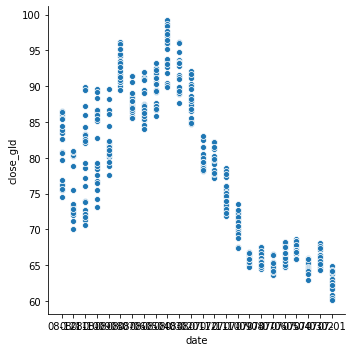

In [50]:
sns.relplot(x='date', y='close_gld', data=df_crisis)